# Rock-paper-scissors with Keras/TensorFlow

Date: 2023/10/14

Classification: rock, paper, 
scissors

## Preparing data set for DNN

In [2]:
DATA_FOLDER = '../python/ThermographyGUI/data/'
SCREENSHOTS_FOLDER = '../python/ThermographyGUI/screenshots/'

In [3]:
%matplotlib inline
%run ./zigzag.py

import matplotlib.pyplot as plt
import numpy as np
import time
import random
import os
import sklearn.preprocessing as pp
from scipy.fftpack import dct, idct
import glob

In [4]:
data_files = glob.glob(DATA_FOLDER+'*.csv')
num_all_files = len(data_files)

In [5]:
data_files[0]

'../python/ThermographyGUI/data/paper-20190106130441.csv'

In [6]:
class_labels = {}

for file in data_files:
    label = file.split('-')[0].replace('\\', '/').split('/')[-1]
    if label not in class_labels:
        class_labels[label] = 1
    else:
        class_labels[label] += 1

class_labels

{'paper': 140, 'scissors': 140, 'rock': 140}

In [7]:
#Check if all values of class labels is equal to each other 
if (len(set(class_labels.values())) == 1):
    print('Check OK')
else:
    print('Check NG')

Check OK


In [11]:
num_classes = len(class_labels.keys())
num_files = list(class_labels.values())[0]
num_train_files = int(num_files * 4/5)
num_test_files = num_files - num_train_files
'num_classes: {}, num_train_files: {}, num_test_files: {}'.format(num_classes, num_train_files, num_test_files)

'num_classes: 3, num_train_files: 112, num_test_files: 28'

In [12]:
data_set = {}

class_number = 0

for label in class_labels:
    files = glob.glob(DATA_FOLDER+'{}-*.csv'.format(label))
    random.shuffle(files)
    data_set[label] = (files[:num_train_files], files[num_train_files:num_files], class_number)
    class_number += 1

In [13]:
training_set = []
test_set = []

In [14]:
for k, v in data_set.items():
    files = v[0]
    class_number = v[2]
    for file in files:
        with open(file) as f:
            data = np.array(f.read().split(',')).astype(float)
            training_set.append((data, class_number))
    files = v[1]
    for file in files:
        with open(file) as f:
            data = np.array(f.read().split(',')).astype(float)
            test_set.append((data, class_number))
random.shuffle(training_set)
random.shuffle(test_set)

In [15]:
training_set[0]

(array([19. , 19.8, 20.2, 25.5, 27.2, 24. , 20.2, 19.2, 18.5, 18.8, 23. ,
        26.5, 26.8, 23.2, 19.5, 18.5, 18.5, 19. , 23.8, 26.2, 25.5, 23.2,
        19.2, 19.5, 18.2, 19.2, 24.8, 26.5, 25.2, 21.5, 18.8, 18.8, 18.8,
        20. , 25. , 25. , 22. , 19.2, 18. , 17.8, 17.5, 19.5, 21.5, 23. ,
        19.2, 17.2, 16.8, 16.5, 16.5, 18.5, 18. , 21.8, 18.2, 16.8, 16.5,
        16.8, 16.2, 16.5, 16.8, 18. , 17. , 16.8, 16.5, 16.5]),
 1)

In [16]:
class_labels = [None for _ in range(len(data_set))]

# Class number and class labels
for k,v in data_set.items():
    print('{}: {}'.format(v[2],k))
    class_labels[v[2]] = k
    
import yaml
with open(DATA_FOLDER+'class_labels.yaml', 'w') as f:
    yaml.dump(class_labels, f)

0: paper
1: scissors
2: rock


In [26]:
train_data, train_labels = [], []
test_data, test_labels = [], []

In [27]:
def gen_data_labels(data_set):
    d = []  # data
    l = []  # labels
    for img, label in data_set:
        #img = img.reshape(8,8)
        img = pp.scale(img)  # Standardization
        d.append(img)
        l.append(label)
    d = np.array(d)
    l = np.array(l, dtype=np.uint8)
    return (d, l)

train_data, train_labels = gen_data_labels(training_set)
test_data, test_labels = gen_data_labels(test_set)

In [28]:
train_data[0]

array([-0.36899917, -0.12106272,  0.00290551,  1.6454845 ,  2.17234946,
        1.18060365,  0.00290551, -0.30701506, -0.52395946, -0.43098329,
        0.87068309,  1.95540507,  2.04838124,  0.9326672 , -0.21403889,
       -0.52395946, -0.52395946, -0.36899917,  1.11861954,  1.8624289 ,
        1.6454845 ,  0.9326672 , -0.30701506, -0.21403889, -0.61693563,
       -0.30701506,  1.42854011,  1.95540507,  1.55250833,  0.40580224,
       -0.43098329, -0.43098329, -0.43098329, -0.05907861,  1.49052422,
        1.49052422,  0.56076252, -0.30701506, -0.67891974, -0.74090385,
       -0.83388002, -0.21403889,  0.40580224,  0.87068309, -0.30701506,
       -0.92685619, -1.05082442, -1.14380059, -1.14380059, -0.52395946,
       -0.67891974,  0.49877841, -0.61693563, -1.05082442, -1.14380059,
       -1.05082442, -1.23677676, -1.14380059, -1.05082442, -0.67891974,
       -0.9888403 , -1.05082442, -1.14380059, -1.14380059])

In [29]:
test_labels

array([2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2,
       2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1,
       0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [30]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [31]:
train_labels[0]

array([0., 1., 0.], dtype=float32)

## DNN model

In [63]:
from keras import layers
from keras import models

model = models.Sequential()

LENGTH=64

model.add(layers.Dense(int(LENGTH*1.3), activation='relu', input_shape=(64,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(int(LENGTH*1.3), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 83)                5395      
                                                                 
 dropout_16 (Dropout)        (None, 83)                0         
                                                                 
 dense_25 (Dense)            (None, 83)                6972      
                                                                 
 dropout_17 (Dropout)        (None, 83)                0         
                                                                 
 dense_26 (Dense)            (None, 3)                 252       
                                                                 
Total params: 12619 (49.29 KB)
Trainable params: 12619 (49.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
from IPython.display import SVG
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [66]:
EPOCHS = 300
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Epoch 1/300
11/11 [==============================] - 0s 6ms/step - loss: 1.2635 - accuracy: 0.3333 - val_loss: 0.9900 - val_accuracy: 0.4524
Epoch 2/300
11/11 [==============================] - 0s 2ms/step - loss: 1.0985 - accuracy: 0.4018 - val_loss: 0.9250 - val_accuracy: 0.5357
Epoch 3/300
11/11 [==============================] - 0s 2ms/step - loss: 1.0182 - accuracy: 0.4792 - val_loss: 0.8798 - val_accuracy: 0.6190
Epoch 4/300
11/11 [==============================] - 0s 2ms/step - loss: 0.9329 - accuracy: 0.5595 - val_loss: 0.8406 - val_accuracy: 0.7024
Epoch 5/300
11/11 [==============================] - 0s 2ms/step - loss: 0.9178 - accuracy: 0.5744 - val_loss: 0.7970 - val_accuracy: 0.7500
Epoch 6/300
11/11 [==============================] - 0s 2ms/step - loss: 0.8551 - accuracy: 0.6012 - val_loss: 0.7646 - val_accuracy: 0.7143
Epoch 7/300
11/11 [==============================] - 0s 2ms/step - loss: 0.8312 - accuracy: 0.6399 - val_loss: 0.7212 - val_accuracy: 0.7619
Epoch 8/300
1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


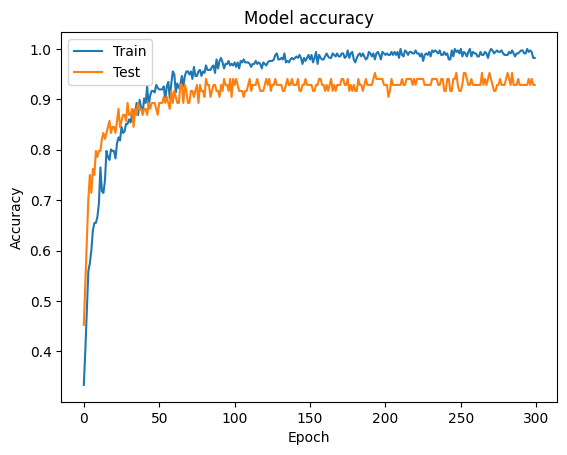

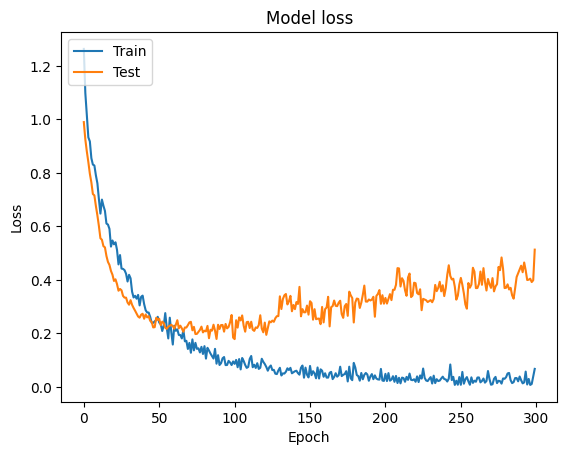

In [67]:
print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Save the model

In [57]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = 'rock_paper_scissors_dct_{}.h5'.format(dt)
model.save(filename)

## load the model

In [27]:
del model
model = models.load_model(filename)

## Confirmation

In [28]:
import numpy as np
import matplotlib.pyplot as plt
train_data.shape

(336, 20)

In [29]:
layer_outputs = [layer.output for layer in model.layers]

In [30]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)

3/3 [==============================] - 0s 4ms/step


In [31]:
class_labels

['paper', 'rock', 'scissors']

In [32]:
(activations[-1][:10]*100).astype(int)

array([[ 98,   0,   0],
       [ 93,   2,   3],
       [  4,   7,  88],
       [ 96,   2,   1],
       [  0, 100,   0],
       [ 47,  52,   0],
       [  0,   1,  98],
       [  0,  99,   0],
       [  3,   3,  92],
       [  1,   8,  90]])

In [33]:
test_labels[:10].astype(int)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])